In [364]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [365]:
#Part-I: GDP Analysis of Indian States

#Part1-A
#Reading thee file
#Path where file has been placed - C:/Users/sazeez2/Python databases/Upgrad Python/Python Assignment/Part 1-A/
os.chdir('C:/Users/sazeez2/Python databases/Upgrad Python/Python Assignment/Part 1-A/')
df=pd.read_csv('ab40c054-5031-4376-b52e-9813e776f65e.csv')

In [366]:
df

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal1,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
0,GSDP - CURRENT PRICES (` in Crore),2011-12,379402.00,11063.00,143175.00,247144.00,158074.00,42367.00,615606.00,297539.00,...,359433.00,19208.00,724049.00,115523.00,NaN,3979.00,18768.00,343767.00,16818.00,8736039.00
1,GSDP - CURRENT PRICES (` in Crore),2012-13,411404.00,12547.00,156864.00,282368.00,177511.00,38120.00,724495.00,347032.00,...,401493.00,21663.00,822903.00,131835.00,NaN,4421.00,21609.00,391238.00,18875.00,9946636.00
2,GSDP - CURRENT PRICES (` in Crore),2013-14,464272.00,14602.00,177745.00,317101.00,206690.00,35921.00,807623.00,400662.00,...,452186.00,25593.00,944146.00,149817.00,NaN,5159.00,24787.00,443783.00,21870.00,11236635.00
3,GSDP - CURRENT PRICES (` in Crore),2014-15,526468.00,16761.00,198098.00,373920.00,234982.00,40633.00,895027.00,437462.00,...,511178.00,29667.00,1043371.00,161985.00,NaN,5721.00,27844.00,492424.00,24089.00,12433749.00
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.00,18784.00,224234.00,413503.00,260776.00,45002.00,994316.00,485184.00,...,575631.00,NaN,1153795.00,184091.00,NaN,NaN,30304.00,551963.00,26533.00,13675331.00
5,GSDP - CURRENT PRICES (` in Crore),2016-17,699307.00,NaN,NaN,NaN,290140.00,NaN,NaN,547396.00,...,654294.00,NaN,NaN,NaN,NaN,NaN,NaN,622385.00,29557.00,15251028.00
6,(% Growth over previous year),2012-13,8.43,13.41,9.56,14.25,12.30,-10.02,17.69,16.63,...,11.70,12.78,13.65,14.12,NaN,11.13,15.14,13.81,12.23,13.86
7,(% Growth over previous year),2013-14,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,...,12.63,18.14,14.73,13.64,NaN,16.68,14.71,13.43,15.87,12.97
8,(% Growth over previous year),2014-15,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,...,13.05,15.92,10.51,8.12,NaN,10.89,12.33,10.96,10.14,10.65
9,(% Growth over previous year),2015-16,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,...,12.61,NaN,10.58,13.65,NaN,NaN,8.84,12.09,10.15,9.99


In [367]:
#Removing the rows: '(% Growth over the previous year)' and 'GSDP - CURRENT PRICES (` in Crore)' for the year 2016-17.
df=df[df['Duration']!='2016-17']
#Removing columns which have all null values
df=df.dropna(axis=1, how='all')
#Finding columns with any nullvalues
col_with_null=df.columns[df.isna().any()].tolist()
#Masking '(% Growth over the previous year)' and 'GSDP - CURRENT PRICES (` in Crore)' row-wise
mask1 = (df['Items  Description']=='GSDP - CURRENT PRICES (` in Crore)')
mask2 = (df['Items  Description']=='(% Growth over previous year)')
#Filling the columns with null values by taking an average of their mean with the help of masks created
for col in col_with_null:
    avg_filler1 = df.loc[mask1, col].mean()
    avg_filler2 = df.loc[mask2, col].mean()
    df.loc[df[col].isnull() & mask1, col] = avg_filler1
    df.loc[df[col].isnull() & mask2, col] = avg_filler2
    
#Finding the names of all cols
all_cols=df.columns.tolist()
#Filtering only state and UT names
state_cols=[i for i in all_cols if i not in ('Items  Description','Duration')]

In [368]:
#Calculating the average growth of states over the duration 2013-14, 2014-15 and 2015-16 by taking the mean of the row '(% Growth over previous year)'

temp=pd.DataFrame()
#Creating a mask to filter only % Growth over previous year
mask3 = (df['Items  Description']=='(% Growth over previous year)')
temp=['Average_growth','Across All years']
for col in state_cols:
    #average growth of states over the duration 2013-14, 2014-15 and 2015-16 by taking the mean of the row '(% Growth over previous year)'
    avg = df.loc[mask3, col].mean()
    #Adding all the mean values to temporary dataframe
    temp.append(np.round(avg,2))
    
#Adding a new row of mean values of % Growth across all years
df.loc[10]=temp

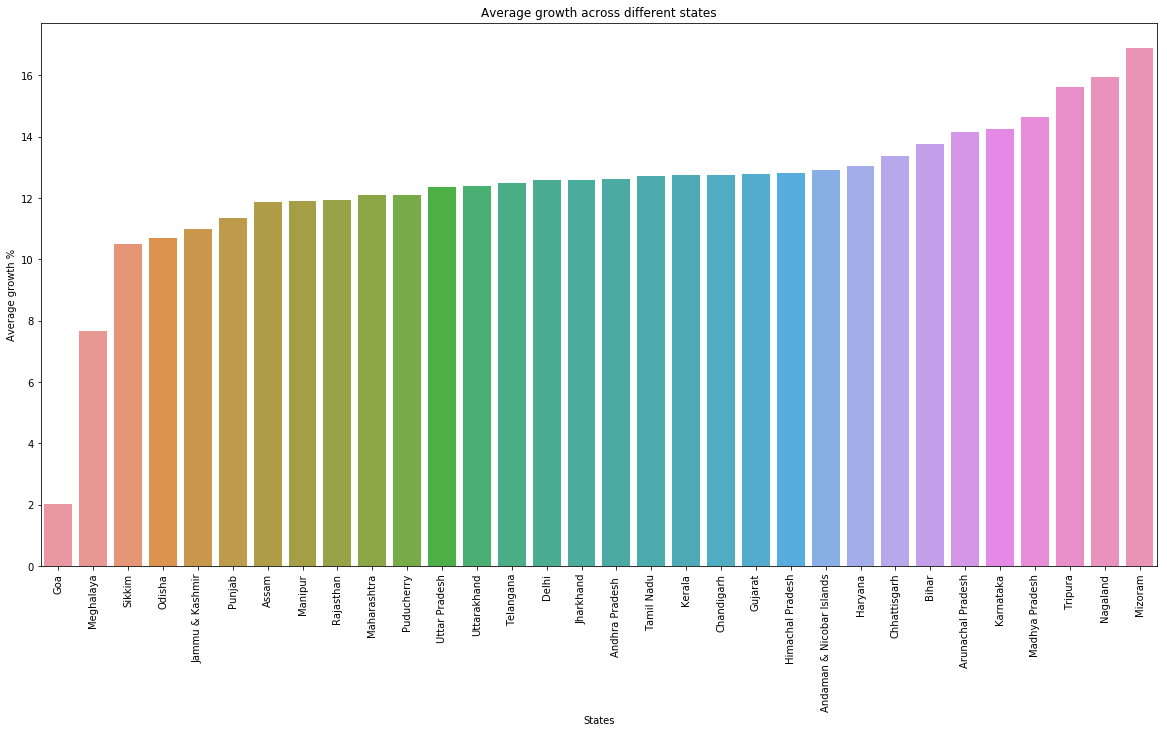

In [369]:
#Plotting a Graph to compare the average growth of different states

#Storing the all the average growth rate values of different states in a temporary variable
temp=df.loc[10][2:34]

#Making necessary changes to bring it to a desirable form so as to make a barplot
temp=pd.DataFrame(temp)
temp.rename(columns={10:'Average growth %'}, inplace=True)
temp=temp.sort_values(by='Average growth %')
cols=temp.index.tolist()

#Plotting a bar graph
plt.figure(figsize=(20, 10))
sns.barplot(cols,temp['Average growth %'])
objects = cols
y_pos = np.arange(len(objects))
plt.title("Average growth across different states")
plt.xlabel('States')
plt.ylabel('Average growth %')

#Rotating the labels across x-axis by 90-degree
plt.xticks(y_pos, objects,rotation='90')
plt.show()

In [370]:
#finding the states with highest and lowest growth rates

i=max(df.loc[10][2:])
j=min(df.loc[10][2:])
for col in all_cols:
    if df.loc[10][col]==i:
        print("Highest growth rate is of " +str(col)+ " state: "+str(i))
    elif df.loc[10][col]==j:
        print("Lowest growth rate is of " +str(col)+ " state: "+str(j))

Lowest growth rate is of Goa state: 2.02
Highest growth rate is of Mizoram state: 16.87


In [371]:
#States with lowest average growth rates
temp.head()

,Average growth %
Goa,2.02
Meghalaya,7.67
Sikkim,10.49
Odisha,10.71
Jammu & Kashmir,11


In [372]:
#States with highest average growth rates
temp.tail()

,Average growth %
Karnataka,14.23
Madhya Pradesh,14.65
Tripura,15.61
Nagaland,15.95
Mizoram,16.87


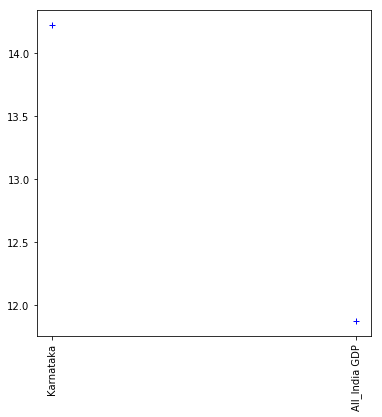

In [373]:
# average growth rate of my home state and how it compares to the national average over this duration.

#My home state-Karnataka
selected_cols=['Karnataka','All_India GDP']
plt.figure(figsize=(6, 6))
plt.plot(selected_cols,df.loc[10][selected_cols],'b+')
objects = selected_cols
y_pos = np.arange(len(objects))
 
plt.xticks(y_pos, objects,rotation='90')
plt.show()

In [374]:
print("Growth rate of my home state-Karnataka is: "+str(df.loc[10]['Karnataka'])+"%")
print("Growth rate across All-India is: "+str(df.loc[10]['All_India GDP'])+"%")

Growth rate of my home state-Karnataka is: 14.23%
Growth rate across All-India is: 11.87%


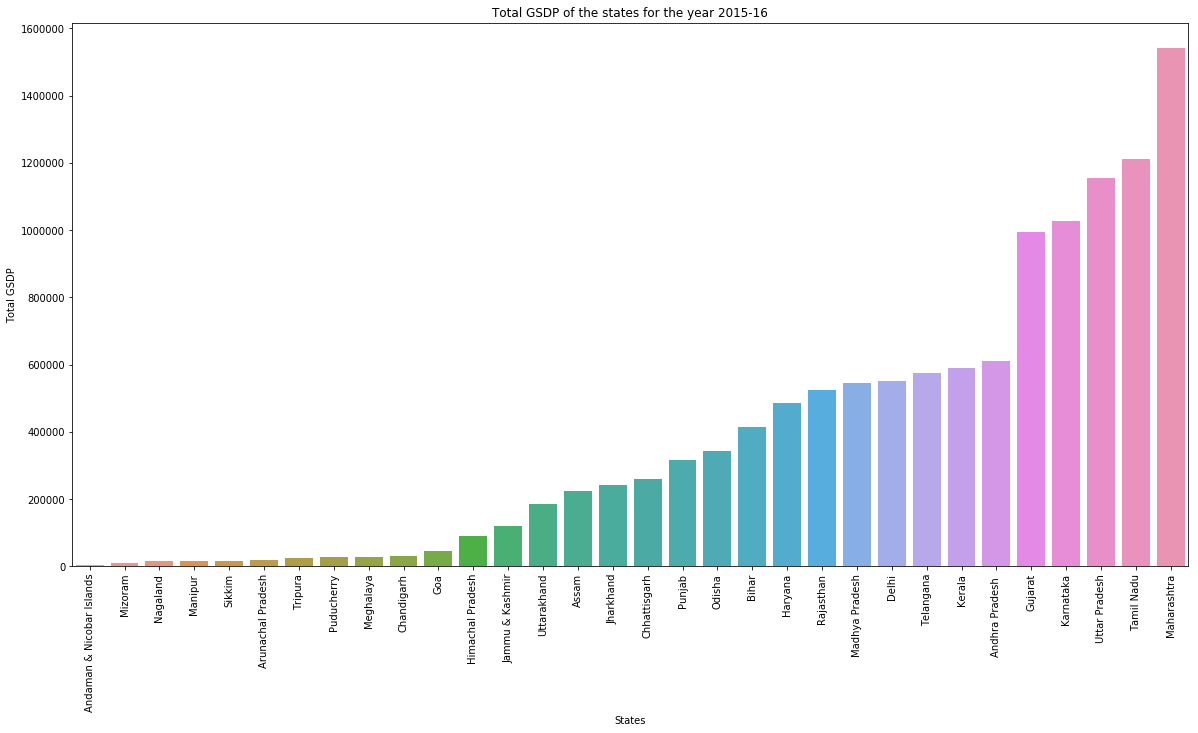

In [375]:
#Plotting the total GSDP of the states for the year 2015-16

#Storing the Total GSDP of different states in a temporary variable
temp_gsdp=df.loc[4][2:34]

#Making necessary changes to bring it to a desirable form so as to make a barplot
temp_gsdp=pd.DataFrame(temp_gsdp)
temp_gsdp.rename(columns={4:df.iloc[4][0]}, inplace=True)
temp_gsdp=temp_gsdp.sort_values(by='GSDP - CURRENT PRICES (` in Crore)')

#Plotting a bargraph
cols=temp_gsdp.index.tolist()
plt.figure(figsize=(20, 10))
sns.barplot(cols,temp_gsdp['GSDP - CURRENT PRICES (` in Crore)'])
objects = cols
y_pos = np.arange(len(objects))
plt.title("Total GSDP of the states for the year 2015-16")
plt.xlabel('States')
plt.ylabel('Total GSDP')

plt.xticks(y_pos, objects,rotation='90')
plt.show()

In [376]:
#States with lowest GSDP in the year 2015-16
temp_gsdp.head()

,GSDP - CURRENT PRICES (` in Crore)
Andaman & Nicobar Islands,4820
Mizoram,9368.25
Nagaland,15121
Manipur,15226
Sikkim,16637


In [377]:
#States with highest GSDP in the year 2015-16
temp_gsdp.tail()

,GSDP - CURRENT PRICES (` in Crore)
Gujarat,994316
Karnataka,1.02707e+06
Uttar Pradesh,1.1538e+06
Tamil Nadu,1.21267e+06
Maharashtra,1.54027e+06


In [378]:
#Part-I: GDP Analysis of Indian States

#Part1-B
#Merging all the files
#Path where all state files has been placed -C:/Users/sazeez2/Python databases/Upgrad Python/Python Assignment/Part 1-A/States 2
#Changing the directory where all states GSDP distributed into different sectors have been placed
os.chdir('C:/Users/sazeez2/Python databases/Upgrad Python/Python Assignment/Part 1-A/States 2')

cwd=os.getcwd()
dirs=os.listdir(cwd)

df=pd.DataFrame()
df=pd.read_csv('NAD-Andhra_Pradesh-GSVA_const_2016-17.csv')
df=df.loc[::,['S.No.','Item','2014-15']]
df.rename(columns={'2014-15':'Andhra_Pradesh'}, inplace=True)
count=0
#Reading all the files from the given directory
for items in dirs: 
    if items.find('NAD-Andhra_Pradesh-GSVA_const_2016-17.csv')>=0:
        #print(items)
        continue
    elif items.find('GSVA')>0 and items.find('.csv')>0:
        x=cwd+'\\'+items
        df1 = pd.read_csv((x))
        #Taking only the data for 2014-15
        df1=df1.loc[::,['S.No.','Item','2014-15']]
        #print(df1)
        df1.rename(columns={'2014-15':str(items.split('-')[1])}, inplace=True)
        df=pd.merge(df,df1,on=['S.No.','Item'])
        
df.set_index("S.No.", inplace=True)
df.fillna(0, inplace=True)
df.head()

,Item,Andhra_Pradesh,Arunachal_Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal_Pradesh,...,Nagaland,Odisha,Punjab,Rajasthan,Sikkim,Tamil_Nadu,Telangana,Tripura,Uttarakhand,Uttar_Pradesh
S.No.,,,,,,,,,,,,,,,,,,,,,
1,"Agriculture, forestry and fishing",11259968.0,513597,3226643,5971458,3010401,218876,11657931.0,6377952,1303842.0,...,444720,4657383,7895027.0,12877970,98080,9965253,5590964,705272.0,1349161.0,18534936
1.1,Crops,6138257.0,312069,2373106,3542583,2040506,106196,8407995.0,3647847,791702.0,...,284921,3150624,4865022.0,7290396,84064,5370633,2955512,403012.0,724374.0,11938796
1.2,Livestock,3118532.0,38040,168351,1537112,248185,23222,2216596.0,2281985,110068.0,...,74905,579748,2286318.0,4138540,9754,3802479,2251636,75565.0,334828.0,5089886
1.3,Forestry and logging,241146.0,157753,234186,439923,427452,11703,609714.0,358057,394762.0,...,77632,589805,674784.0,1398176,3878,324971,180754,142734.0,286222.0,1187513
1.4,Fishing and aquaculture,1762033.0,5735,451000,451840,294258,77754,423626.0,90064,7309.0,...,7262,337205,68903.0,50859,385,467170,203062,83961.0,3737.0,318741


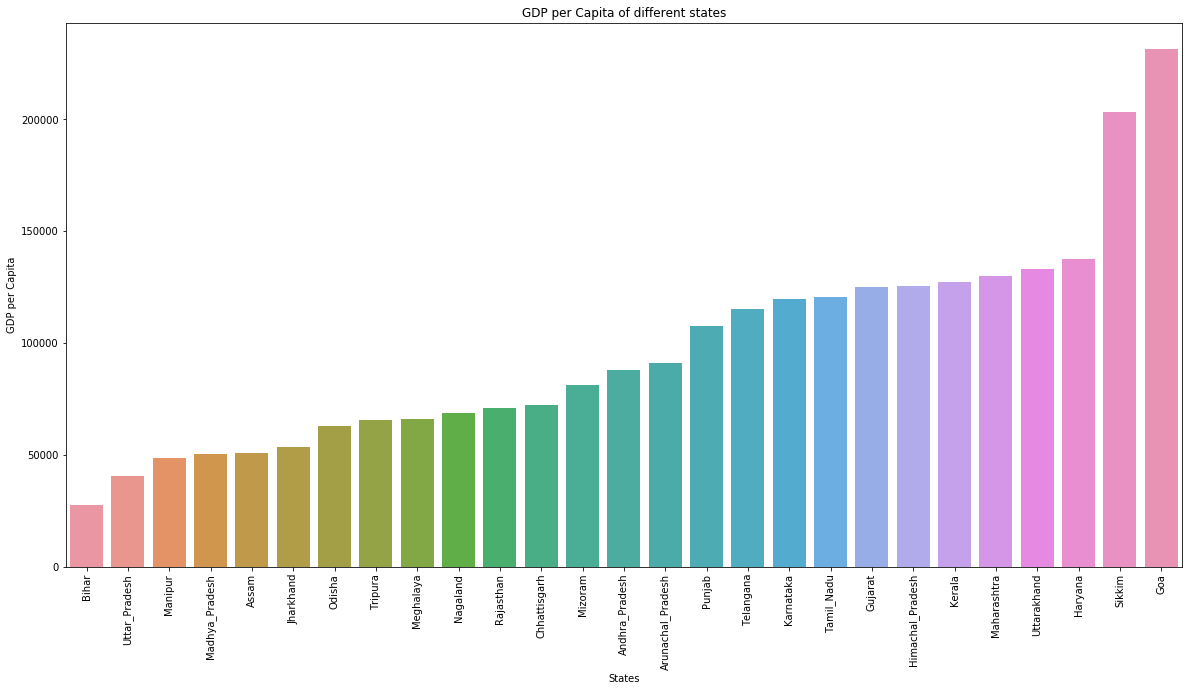

In [379]:
#Plotting the GDP per capita of different states

#Storing the data of GDP per Capita of different states in a temporary variable
temp_pcgsdp=df.loc['17'][1:]

#Making neceassary changes to data to plot desirable barplot 
temp_pcgsdp=pd.DataFrame(temp_pcgsdp)
temp_pcgsdp.rename(columns={'17':df.loc['17'][0]}, inplace=True)
temp_pcgsdp=temp_pcgsdp.sort_values(by='Per Capita GSDP (Rs.)')

#plotting a bargraph
cols=temp_pcgsdp.index.tolist()
#print(cols)
plt.figure(figsize=(20, 10))
sns.barplot(cols,temp_pcgsdp['Per Capita GSDP (Rs.)'].values)
plt.title('GDP per Capita of different states')
plt.ylabel('GDP per Capita')
plt.xlabel('States')
objects = cols
y_pos = np.arange(len(objects))
 

plt.xticks(y_pos, objects,rotation='90')
plt.show()

In [380]:
#Bottom 5 states based on GDP per Capita
temp_pcgsdp.head()

,Per Capita GSDP (Rs.)
Bihar,27675
Uttar_Pradesh,40469
Manipur,48684
Madhya_Pradesh,50183
Assam,51016


In [381]:
#Top 5 states based on GDP per Capita
temp_pcgsdp.tail()

,Per Capita GSDP (Rs.)
Maharashtra,130056
Uttarakhand,133047
Haryana,137513
Sikkim,203515
Goa,231509


In [382]:
#Finding insights of GDP per capita of different states
print('State with higest GDP per capita is: '+str(temp_pcgsdp.astype('float64').idxmax()[0]))
print('State with lowest GDP per capita is: '+str(temp_pcgsdp.astype('float64').idxmin()[0]))
ratio=temp_pcgsdp['Per Capita GSDP (Rs.)'].max()/temp_pcgsdp['Per Capita GSDP (Rs.)'].min()
print('\nRatio of highest and lowest per capita GDP is:'+str(ratio))

State with higest GDP per capita is: Goa
State with lowest GDP per capita is: Bihar

Ratio of highest and lowest per capita GDP is:8


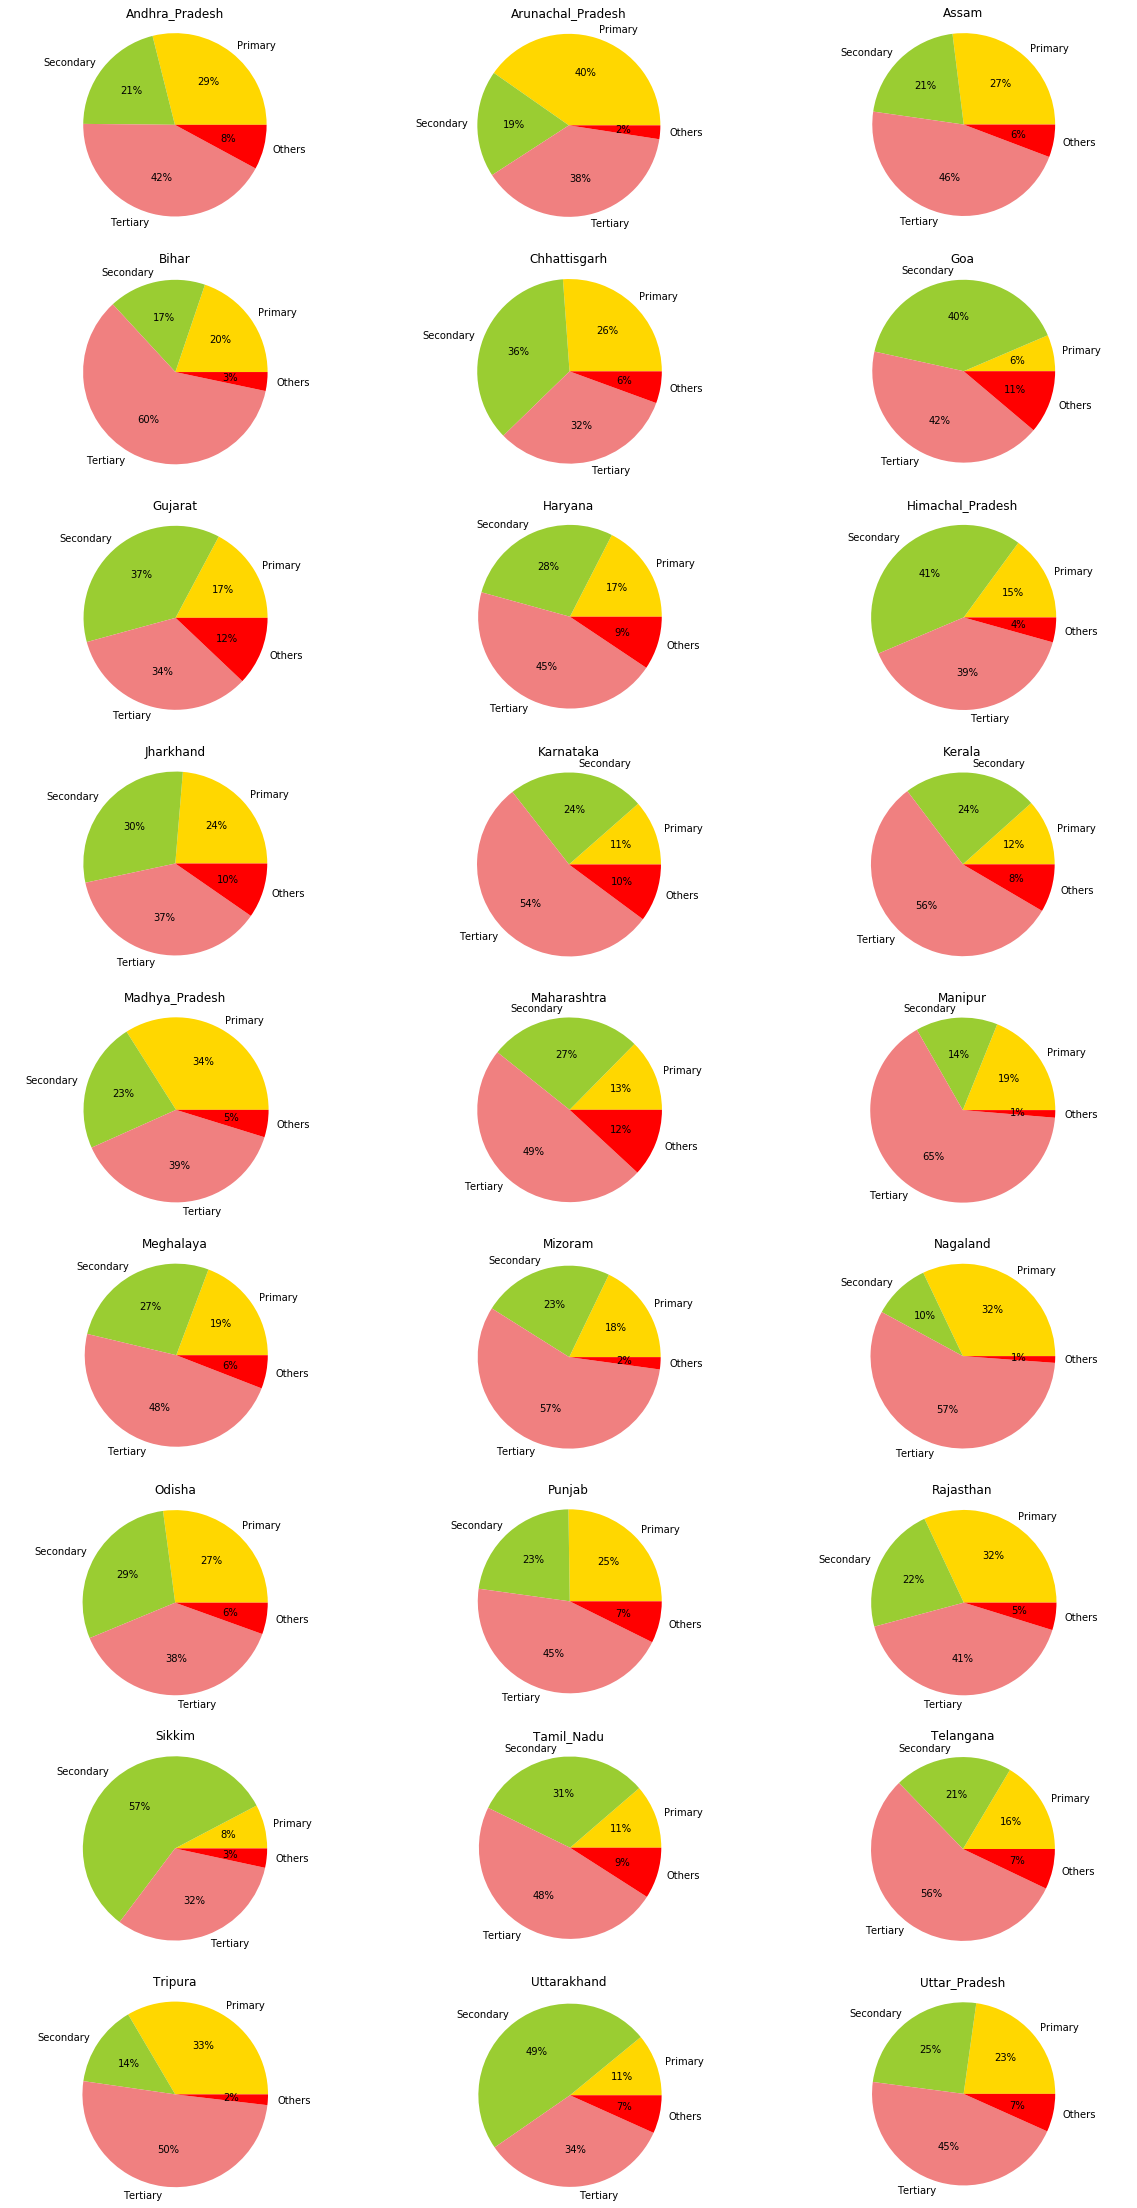

<Figure size 432x288 with 0 Axes>

In [383]:
#Plotting the percentage contribution of primary, secondary,tertiary sectors along with taxes and subsidies,as a percentage of total GDP for all the states.

#Storing the data of primary,secondary,tertiary,taxes and subsidies in a temporrary variable
temp_pie_data=df.loc[['Total','13','14']]
temp_pie_data=temp_pie_data.T

#Making desirable changes to plot a pie chart,showing the contribution of different sectors towards GDP
new_t=temp_pie_data.iloc[0]
temp_pie_data = temp_pie_data[1:] #take the data less the header row
temp_pie_data.columns = new_t
temp_pie_data.index.rename('state', inplace=True)

#Plotting the pie charts for different states
plt.figure(figsize=(20, 40))
labels = 'Primary', 'Secondary', 'Tertiary','Others'
colors = ['gold', 'yellowgreen', 'lightcoral','red']
i=0
for i in range(0,len(temp_pie_data)):
        sizes = [temp_pie_data.iloc[i][0], temp_pie_data.iloc[i][1], temp_pie_data.iloc[i][2],temp_pie_data.iloc[i][3]-temp_pie_data.iloc[i][4]]
                # Plot
        plt.subplot(9, 3, i+1)
        plt.pie(sizes, labels=labels,autopct='%1.0f%%',colors=colors)
        plt.title(temp_pie_data.index[i])
        plt.axis('equal')
plt.show()
plt.savefig('Percentage contribution.png')

In [384]:
#Categorising the states into four categories based on GDP per capita 

#Dividing the states based on quantile values
temp_quant=temp_pcgsdp['Per Capita GSDP (Rs.)'].quantile([0.20,0.5, 0.85, 1])

#Dividind the states into different categories 
c1=[]
c2=[]
c3=[]
c4=[]
for i in range(0,len(temp_pcgsdp)):
    if temp_pcgsdp.iloc[i][0]<=temp_quant.iloc[0]:
        c4.append(temp_pcgsdp.index[i])
    elif temp_pcgsdp.iloc[i][0]<=temp_quant.iloc[1]:
        c3.append(temp_pcgsdp.index[i])
    elif temp_pcgsdp.iloc[i][0]<=temp_quant.iloc[2]:
        c2.append(temp_pcgsdp.index[i])
    elif temp_pcgsdp.iloc[i][0]<=temp_quant.iloc[3]:
        c1.append(temp_pcgsdp.index[i])
        
#Making necessary changes to create new categories 
df1=df.T
new_header=df1.iloc[0]
df1 = df1[1:] #take the data less the header row
df1.columns = new_header
df1.index.rename('state', inplace=True)
c1=df1.loc[c1]
c2=df1.loc[c2]
c3=df1.loc[c3]
c4=df1.loc[c4]

In [385]:
print("States belonging to C1: "+str(c1.index.tolist()))
print("States belonging to C2: "+str(c2.index.tolist()))
print("States belonging to C3: "+str(c3.index.tolist()))
print("States belonging to C4: "+str(c4.index.tolist()))

States belonging to C1: ['Uttarakhand', 'Haryana', 'Sikkim', 'Goa']
States belonging to C2: ['Arunachal_Pradesh', 'Punjab', 'Telangana', 'Karnataka', 'Tamil_Nadu', 'Gujarat', 'Himachal_Pradesh', 'Kerala', 'Maharashtra']
States belonging to C3: ['Odisha', 'Tripura', 'Meghalaya', 'Nagaland', 'Rajasthan', 'Chhattisgarh', 'Mizoram', 'Andhra_Pradesh']
States belonging to C4: ['Bihar', 'Uttar_Pradesh', 'Manipur', 'Madhya_Pradesh', 'Assam', 'Jharkhand']


In [386]:
#Finding the top 3/4/5 sub-sectors which contribute to nearly 80% of the GSDP of each category

#Filtering names of only subsectors
allcol_names=c1.columns.tolist()
sectors=['Primary','Secondary','Tertiary']
calc_terms=['TOTAL GSVA at basic prices',
 'Taxes on Products',
 'Subsidies on products',
 'Gross State Domestic Product',
 "Population ('00)",
 'Per Capita GSDP (Rs.)']
sub_sectors=[i for i in allcol_names if i not in sectors if i not in calc_terms]

#Summing the data of sub_sectors of every category(c1,c2,c3,c4)
data_c1=c1[sub_sectors].sum()
data_c2=c2[sub_sectors].sum()
data_c3=c3[sub_sectors].sum()
data_c4=c4[sub_sectors].sum()


Top 6 sectors of C1 contribute to: 81.56% of GSDP
Top 6 sectors of C1 are: 
1) Manufacturing
2) Agriculture, forestry and fishing
3) Real estate, ownership of dwelling & professional services
4) Trade, repair, hotels and restaurants
5) Trade & repair services
6) Crops


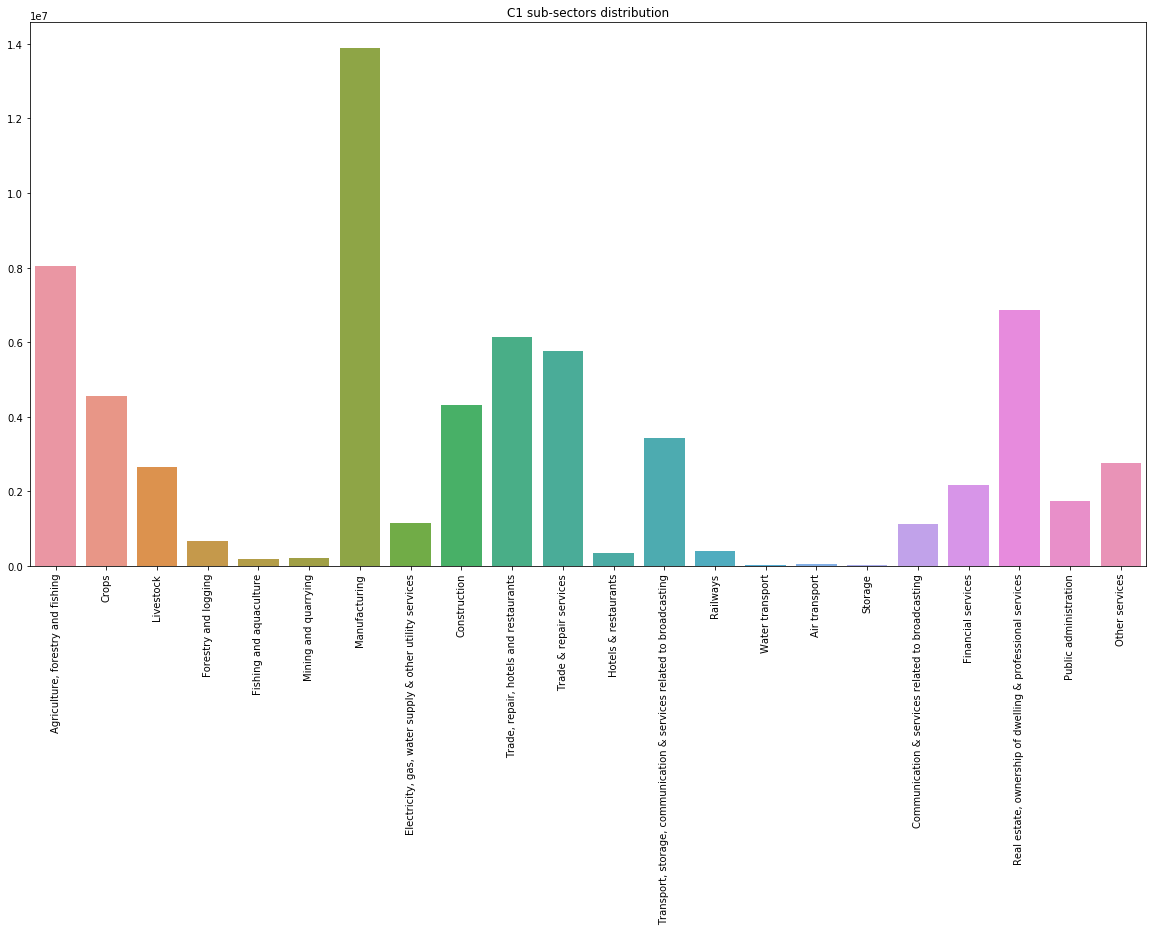

In [387]:
#Category-wise analysis analysis

#For C1
percent1=np.round((data_c1.sort_values(ascending=False)[0:6].sum()/c1['Gross State Domestic Product'].sum())*100,2)
print('\nTop 6 sectors of C1 contribute to: '+str(percent1)+'% of GSDP')
l1=data_c1.sort_values(ascending=False)[0:6].index.tolist()
print('Top 6 sectors of C1 are: ')
for i in range(len(l1)):
    print(str(i+1)+") "+l1[i])
    
#Plotting graph for C1
plt.figure(figsize=(20, 10))
objects = sub_sectors
y_pos = np.arange(len(objects))
sns.barplot(x=sub_sectors, y=data_c1)
plt.xticks(y_pos, objects,rotation='90')
plt.title("C1 sub-sectors distribution")
plt.show()


Top 7 sectors of C2 contribute to: 80.68% of GSDP
Top 7 sectors of C2 are: 
1) Manufacturing
2) Real estate, ownership of dwelling & professional services
3) Agriculture, forestry and fishing
4) Trade, repair, hotels and restaurants
5) Trade & repair services
6) Construction
7) Crops


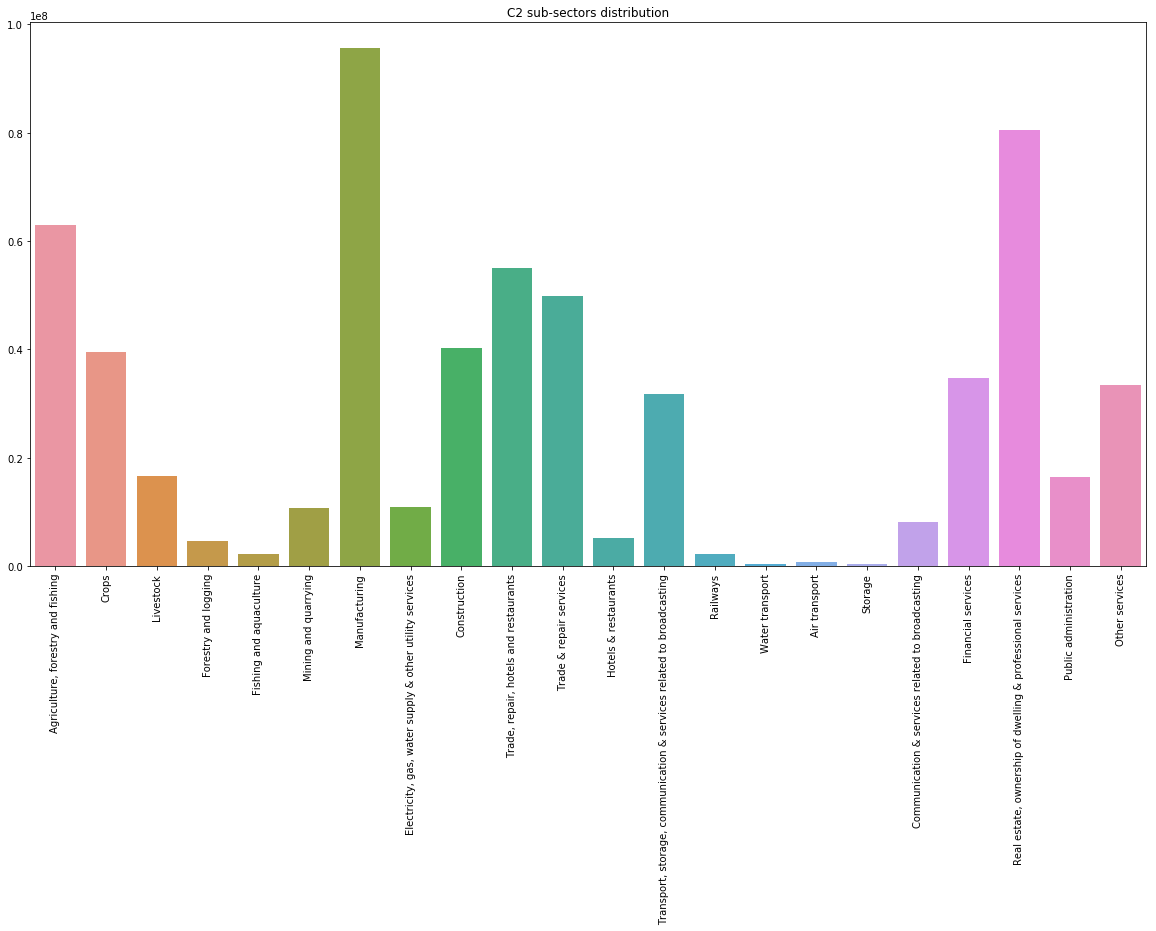

In [388]:
#Category-wise analysis analysis

#For C2
percent2=np.round((data_c2.sort_values(ascending=False)[0:7].sum()/c2['Gross State Domestic Product'].sum())*100,2)
print('\nTop 7 sectors of C2 contribute to: '+str(percent2)+'% of GSDP')
l2=data_c2.sort_values(ascending=False)[0:7].index.tolist()
print('Top 7 sectors of C2 are: ')
for i in range(len(l2)):
    print(str(i+1)+") "+l2[i])
    
#Plotting graph for C2
plt.figure(figsize=(20, 10))
objects = sub_sectors
y_pos = np.arange(len(objects))
sns.barplot(x=sub_sectors, y=data_c2)
plt.xticks(y_pos, objects,rotation='90')
plt.title("C2 sub-sectors distribution")
plt.show()



Top 7 sectors of C3 contribute to: 84.6% of GSDP
Top 7 sectors of C3 are: 
1) Agriculture, forestry and fishing
2) Manufacturing
3) Crops
4) Trade, repair, hotels and restaurants
5) Real estate, ownership of dwelling & professional services
6) Construction
7) Trade & repair services


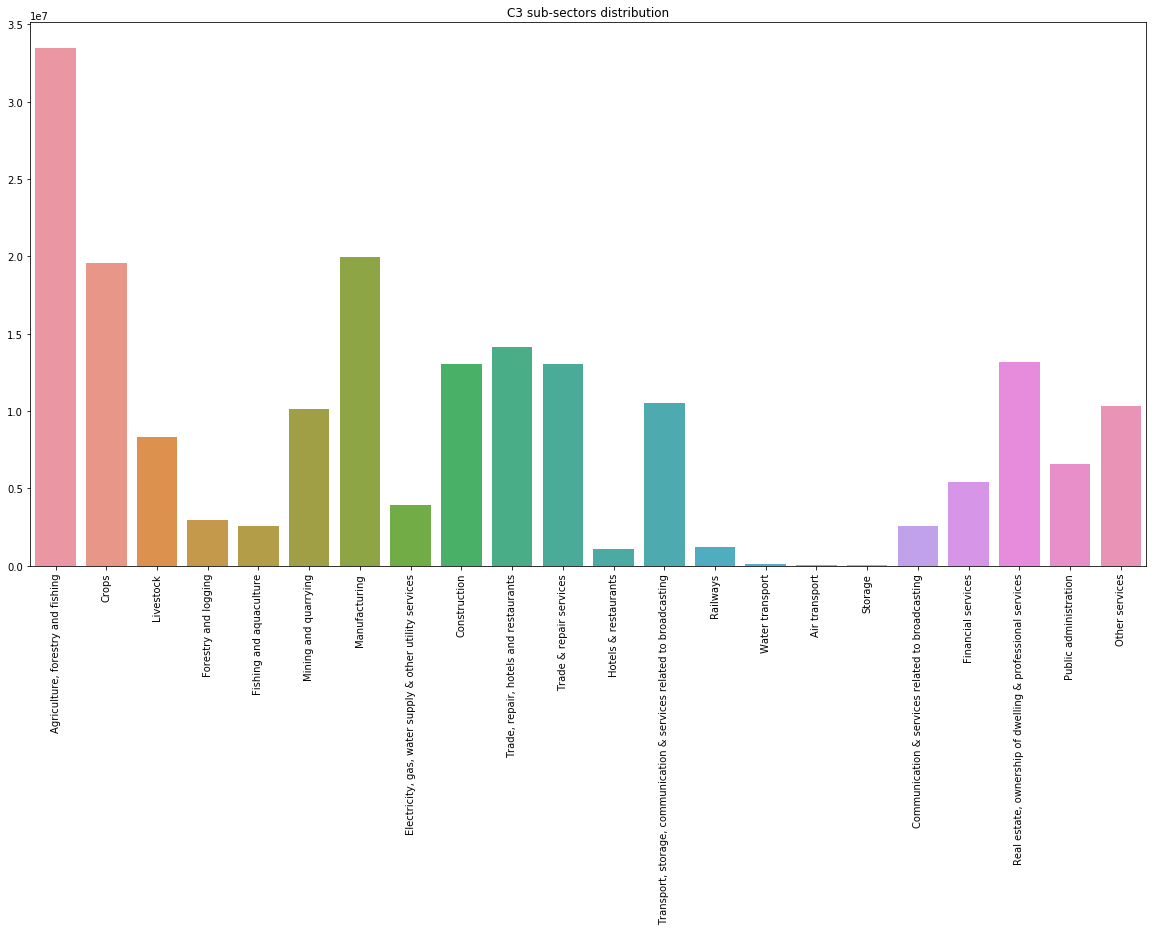

In [389]:
#Category-wise analysis analysis

#For C3
percent3=np.round((data_c3.sort_values(ascending=False)[0:7].sum()/c3['Gross State Domestic Product'].sum())*100,2)
print('\nTop 7 sectors of C3 contribute to: '+str(percent3)+'% of GSDP')
l3=data_c3.sort_values(ascending=False)[0:7].index.tolist()
print('Top 7 sectors of C3 are: ')
for i in range(len(l3)):
    print(str(i+1)+") "+l3[i])
    
#Plotting graph for C3
plt.figure(figsize=(20, 10))
objects = sub_sectors
y_pos = np.arange(len(objects))
sns.barplot(x=sub_sectors, y=data_c3)
plt.xticks(y_pos, objects,rotation='90')
plt.title("C3 sub-sectors distribution")
plt.show()


Top 6 sectors of C4 contribute to: 82.89% of GSDP
Top 6 sectors of C4 are: 
1) Agriculture, forestry and fishing
2) Crops
3) Trade, repair, hotels and restaurants
4) Manufacturing
5) Trade & repair services
6) Real estate, ownership of dwelling & professional services


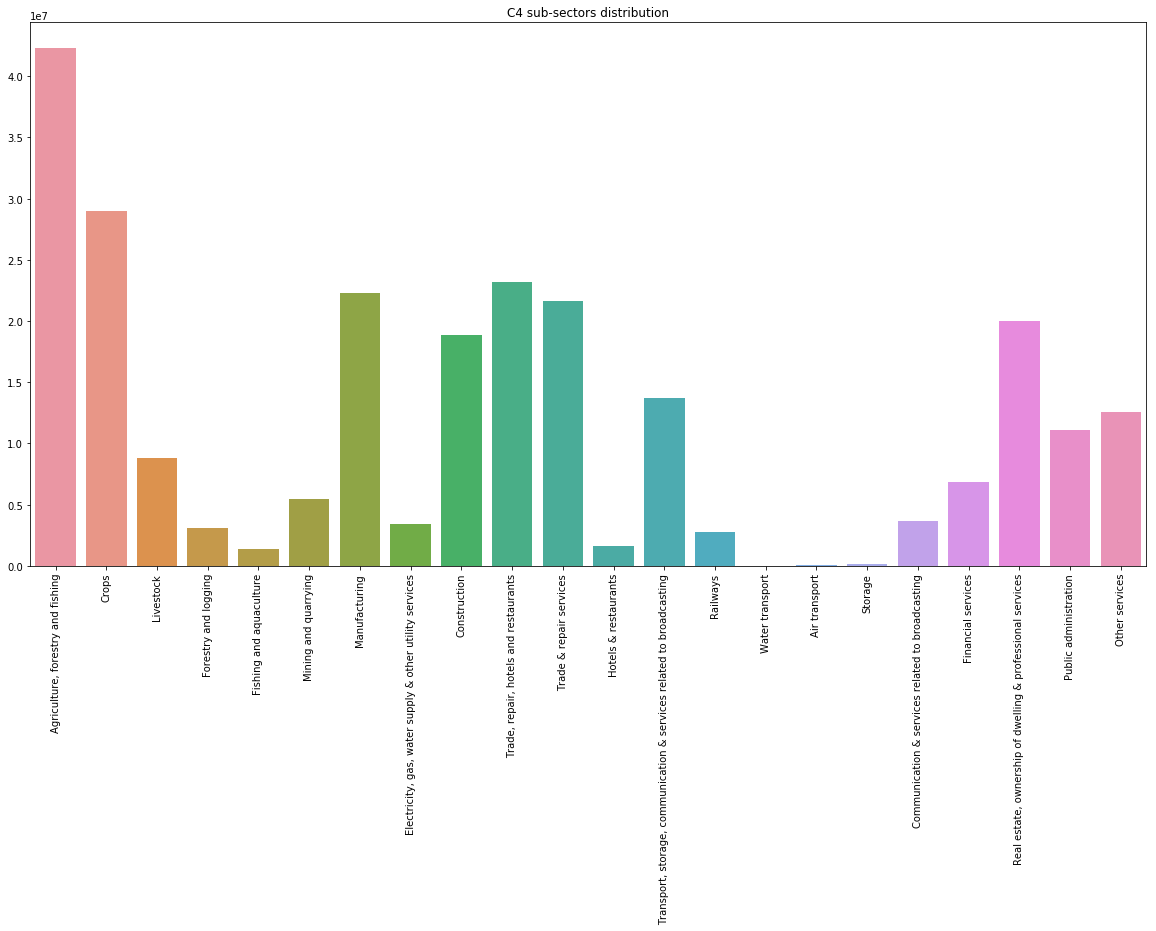

In [390]:
#Category-wise analysis analysis

#For C4
percent4=np.round((data_c4.sort_values(ascending=False)[0:6].sum()/c4['Gross State Domestic Product'].sum())*100,2)
print('\nTop 6 sectors of C4 contribute to: '+str(percent4)+'% of GSDP')
l4=data_c4.sort_values(ascending=False)[0:6].index.tolist()
print('Top 6 sectors of C4 are: ')
for i in range(len(l4)):
    print(str(i+1)+") "+l4[i])
    
#Plotting graph for C4
plt.figure(figsize=(20, 10))
objects = sub_sectors
y_pos = np.arange(len(objects))
sns.barplot(x=sub_sectors, y=data_c4)
plt.xticks(y_pos, objects,rotation='90')
plt.title("C4 sub-sectors distribution")
plt.show()

c:\python27\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


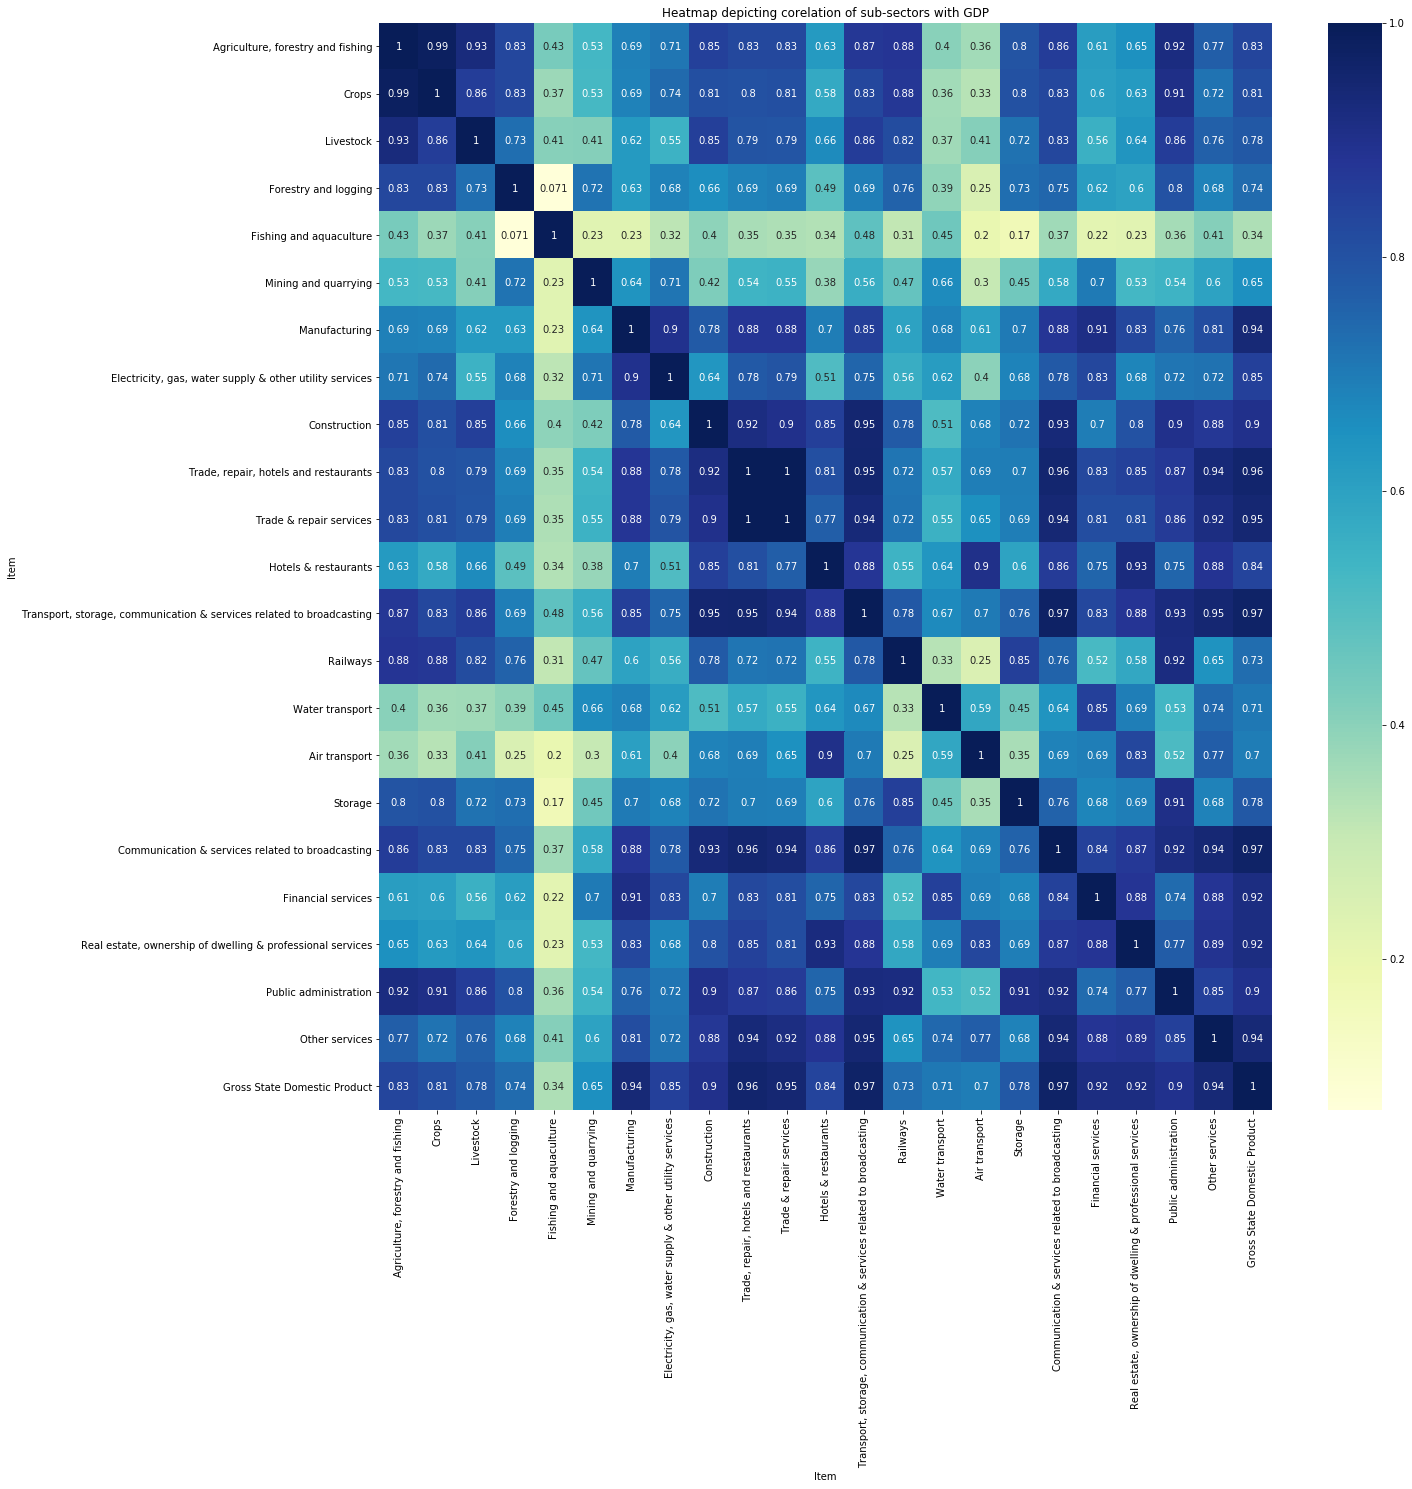

In [391]:
#Finding corelation sub-sectors with GDP

#Creating a temporary dataframe with only sub-sectors and GSDP as columns
df2=df1[sub_sectors]
df2['Gross State Domestic Product']=df1['Gross State Domestic Product']
#Convert all datatypes to float to perform corelation
df2=pd.DataFrame(df2,dtype=float)

#plotting a heat-map to understand the corelation of sub-sectors with GDP
# figure size
plt.figure(figsize=(20,20))

# heatmap
sns.heatmap(df2.corr(), cmap="YlGnBu", annot=True)
plt.title('Heatmap depicting corelation of sub-sectors with GDP')
plt.show()

In [392]:
#Analyszing which sub-sectors corelate with GDP
corr1=df2.corr()
corr1['Gross State Domestic Product'].sort_values(ascending=False)[1:11]

Item
Communication & services related to broadcasting                        0.969025
Transport, storage, communication & services related to broadcasting    0.968387
Trade, repair, hotels and restaurants                                   0.957025
Trade & repair services                                                 0.946861
Manufacturing                                                           0.940299
Other services                                                          0.940141
Financial services                                                      0.918529
Real estate, ownership of dwelling & professional services              0.917137
Construction                                                            0.898529
Public administration                                                   0.897534
Name: Gross State Domestic Product, dtype: float64

In [393]:
#Part-II: GDP and Education Drop-out Rates
#Path where file has been placed - C:/Users/sazeez2/Python databases/Upgrad Python/Python Assignment/Part 1-A/
os.chdir('C:/Users/sazeez2/Python databases/Upgrad Python/Python Assignment/Part 1-A/')
#Reading the files
drop_rate=pd.read_csv('rs_session243_au570_1.1.csv')

#Filtering only data for 2014-2015
r1=drop_rate.columns.tolist()
r2=filter(lambda x:'2014-2015' in x,r1)

#Extracting only necessary columns 
drop_rate_14_15=drop_rate[['Sl. No.','Level of Education - State']]
#Storing only data for 2014-2015
drop_rate_14_15[r2]=drop_rate[r2]
#Deleting unnecessary columns
del drop_rate_14_15['Senior Secondary - 2014-2015']
del drop_rate_14_15['Primary - 2014-2015']
del drop_rate_14_15['Sl. No.']
drop_rate_14_15.set_index('Level of Education - State', inplace=True)

In [394]:
drop_rate_14_15

,Primary - 2014-2015.1,Upper Primary - 2014-2015,Secondary - 2014-2015
Level of Education - State,,,
A & N Islands,0.51,1.69,9.870
Andhra Pradesh,6.72,5.20,15.710
Arunachal Pradesh,10.82,6.71,17.110
Assam,15.36,10.51,27.060
Bihar,NaN,4.08,25.900
Chandigarh,NaN,0.44,NaN
Chhatisgarh,2.91,5.85,21.260
Dadra & Nagar Haveli,1.47,4.02,16.770
Daman & Diu,1.11,3.11,32.270


In [395]:
#Filtering only state names so as to match the data from PART 1-B
state_names=df1.index.tolist()
#Split needed to match data of PART 1-B and and PART 2
state_names=[i.replace('_',' ') for i in state_names]
all_names=drop_rate_14_15.index.tolist()
only_states=[i for i in all_names if i in state_names]
#Extracting only matching data of PART 1-B onto PART 2(i.e.filtering drop rate of those states whose GDP value is given)
drop_rate_14_15=drop_rate_14_15.loc[only_states]
#Replacing null values by 0
drop_rate_14_15.fillna(0, inplace=True)

drop_rate_14_15.sort_values(by='Level of Education - State')
only_states_with_=[i.replace(' ','_') for i in only_states]

#Extracting data
gsdp=temp_pcgsdp.loc[only_states_with_]
#Reindexing according to data of PART2
gsdp.index=only_states
#Combining data of PART 1-B(only per capita GDP of different states) with PART 2(Drop-out rate of different states)
drop_rate_14_15['Per Capita GSDP (Rs.)']=gsdp['Per Capita GSDP (Rs.)']

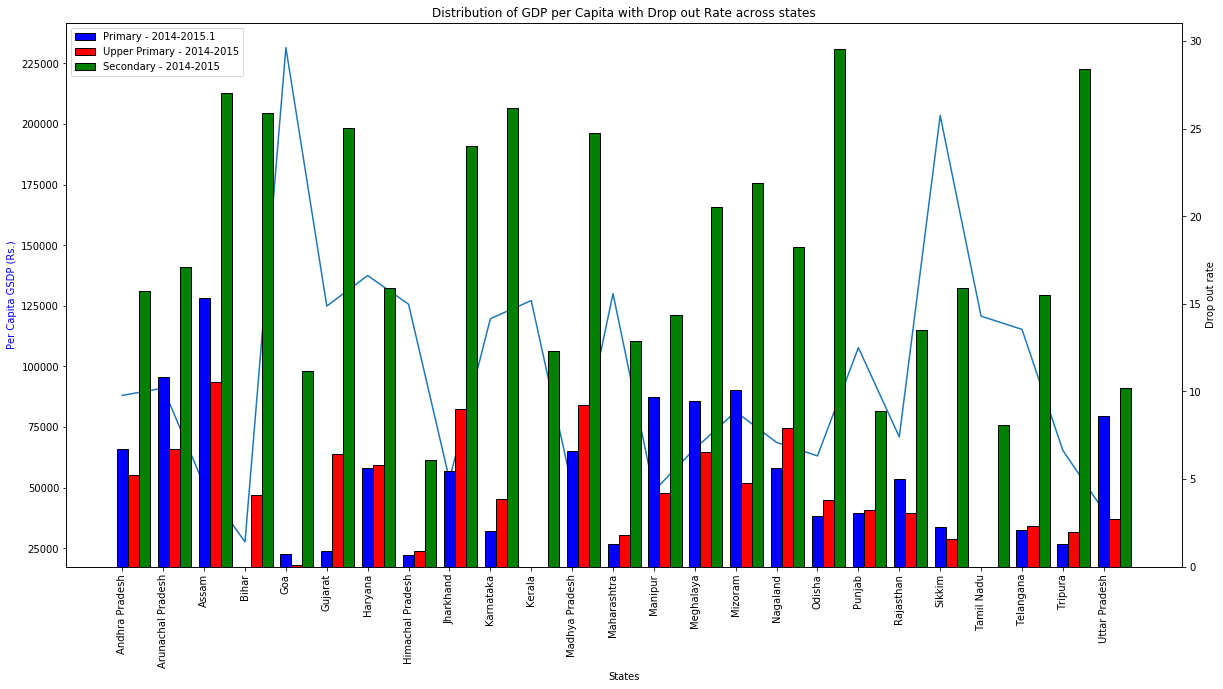

In [396]:
#Analysing if there is any correlation of GDP per capita with dropout rates in education (primary, upper primary and secondary) for the year 2014-2015 for the states

#Analysis through barplots

#plt.figure(figsize=(30, 30))
n=len(drop_rate_14_15)
ind=np.arange(n)
width=0.27

fig, ax1 = plt.subplots(figsize=(20, 10))

#ax1.figure(figsize=(30, 30))
ax1.plot(drop_rate_14_15.index.tolist(),drop_rate_14_15['Per Capita GSDP (Rs.)'])
objects =drop_rate_14_15.index.tolist()
y_pos = np.arange(len(objects))
plt.xticks(y_pos, objects,rotation='90')

ax2 = ax1.twinx()
ax2.bar(ind,drop_rate_14_15['Primary - 2014-2015.1'],width,color='blue',edgecolor = 'black',label='Primary - 2014-2015.1')
ax2.bar(ind+width,drop_rate_14_15['Upper Primary - 2014-2015'],width,color='red',edgecolor = 'black',label='Upper Primary - 2014-2015')
ax2.bar(ind+width*2,drop_rate_14_15['Secondary - 2014-2015'],width,color='green',edgecolor = 'black',label='Secondary - 2014-2015')
ax1.set_ylabel('Per Capita GSDP (Rs.)', color='b')
ax2.set_ylabel('Drop out rate')
ax1.set_xlabel('States')
plt.title('Distribution of GDP per Capita with Drop out Rate across states')

plt.legend()
plt.show()


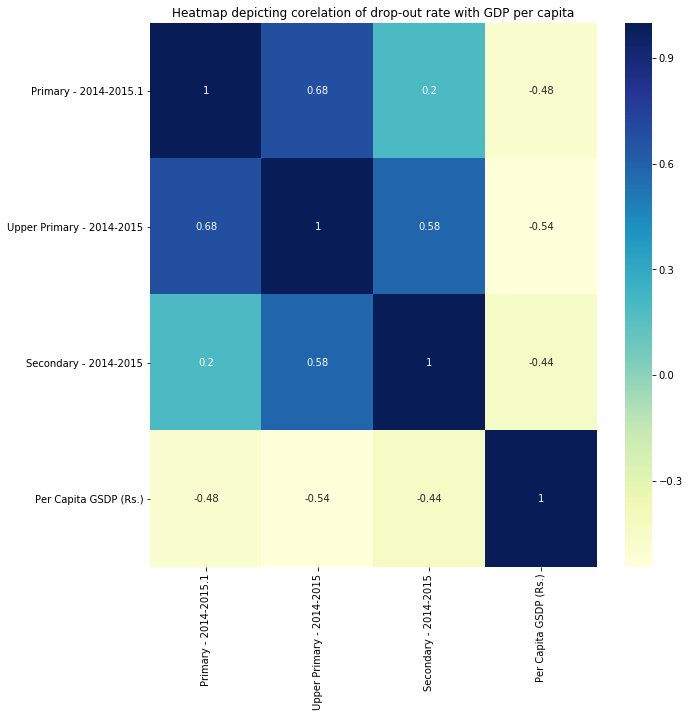

In [397]:
#Analysis through heatmaps

#Convert datatype to float to perform corelation
drop_rate_14_15['Per Capita GSDP (Rs.)']=drop_rate_14_15['Per Capita GSDP (Rs.)'].astype('float')
#plotting a heat-map to understand the corelation of drop-out rate with GDP per capita
# figure size
plt.figure(figsize=(10,10))

# heatmap
sns.heatmap(drop_rate_14_15.corr(), cmap="YlGnBu", annot=True)
plt.title('Heatmap depicting corelation of drop-out rate with GDP per capita')
plt.show()

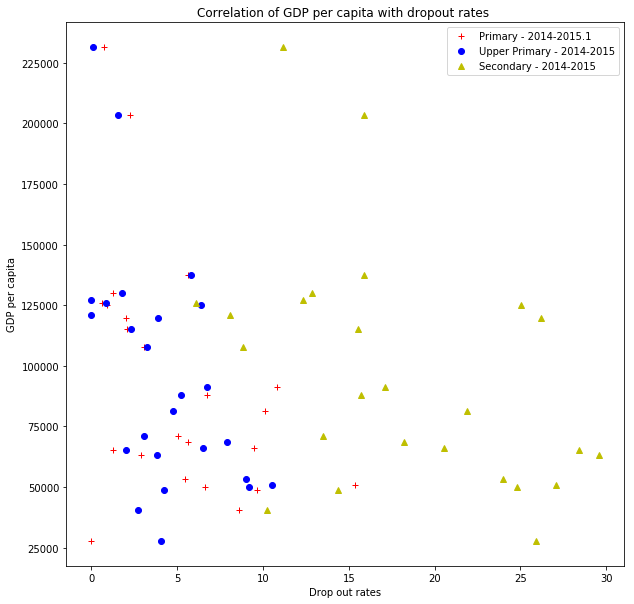

In [398]:
#Analysis through scatter plots

plt.figure(figsize=(10, 10))
plt.plot(drop_rate_14_15['Primary - 2014-2015.1'],drop_rate_14_15['Per Capita GSDP (Rs.)'],'r+',drop_rate_14_15['Upper Primary - 2014-2015'],drop_rate_14_15['Per Capita GSDP (Rs.)'],'bo',drop_rate_14_15['Secondary - 2014-2015'],drop_rate_14_15['Per Capita GSDP (Rs.)'],'y^')
plt.title('Correlation of GDP per capita with dropout rates ')
plt.xlabel('Drop out rates')
plt.ylabel('GDP per capita')
plt.legend(['Primary - 2014-2015.1','Upper Primary - 2014-2015','Secondary - 2014-2015'])
plt.show()